In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df= pd.read_csv("Testing data.csv")

In [ ]:
df.head()

,Timestamp,pm2_5,pm10,no2,so2,co,ozone,station
0,01-01-2024,54.52,100.86,6.59,12.05,0.72,2.00,"Kukrail Picnic Spot-1, Lucknow - UPPCB"
1,02-01-2024,64.06,110.52,6.57,13.96,0.62,17.94,"Kukrail Picnic Spot-1, Lucknow - UPPCB"
2,03-01-2024,55.96,89.77,6.64,21.10,0.31,13.08,"Kukrail Picnic Spot-1, Lucknow - UPPCB"
3,04-01-2024,70.44,110.12,6.67,21.73,0.41,13.75,"Kukrail Picnic Spot-1, Lucknow - UPPCB"
4,05-01-2024,39.32,78.65,6.67,22.93,0.21,10.44,"Kukrail Picnic Spot-1, Lucknow - UPPCB"


In [ ]:
df=df.fillna(0)
df.to_csv('edited_data.csv', index=False)
df.head()

,Timestamp,pm2_5,pm10,no2,so2,co,ozone,station
0,01-01-2024,54.52,100.86,6.59,12.05,0.72,2.00,"Kukrail Picnic Spot-1, Lucknow - UPPCB"
1,02-01-2024,64.06,110.52,6.57,13.96,0.62,17.94,"Kukrail Picnic Spot-1, Lucknow - UPPCB"
2,03-01-2024,55.96,89.77,6.64,21.10,0.31,13.08,"Kukrail Picnic Spot-1, Lucknow - UPPCB"
3,04-01-2024,70.44,110.12,6.67,21.73,0.41,13.75,"Kukrail Picnic Spot-1, Lucknow - UPPCB"
4,05-01-2024,39.32,78.65,6.67,22.93,0.21,10.44,"Kukrail Picnic Spot-1, Lucknow - UPPCB"


In [ ]:
co_breakpoints = [
(0, 1, 0, 50), (1.01, 2, 51, 100), (2.01, 10, 101, 200),
(10.01, 17, 201, 300), (17.01, 34, 301, 400), (34.01, 999999, 401, 500)
]

no2_breakpoints = [
(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200),
(181, 280, 201, 300), (281, 400, 301, 400), (401, 999999, 401, 500)
]

o3_breakpoints = [
(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200),
(169, 208, 201, 300), (209, 748, 301, 400), (749, 999999, 401, 500)
]

so2_breakpoints = [
(0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200),
(381, 800, 201, 300), (801, 1600, 301, 400), (1601, 999999, 401, 500)
]

pm25_breakpoints = [
(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200),
(91, 120, 201, 300), (121, 250, 301, 400), (251, 999999, 401, 500)
]

pm10_breakpoints = [
(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200),
(251, 350, 201, 300), (351, 430, 301, 400), (431, 999999, 401, 500)
]

In [ ]:
def calculate_sub_index(concentration, breakpoints):

    for (low_conc, high_conc, low_index, high_index) in breakpoints:
        if low_conc <= concentration <= high_conc:
            return round(low_index + (high_index - low_index) / (high_conc - low_conc) * (concentration - low_conc))
    # If the concentration is above the highest breakpoint, return the max AQI
    return 500

In [ ]:
def calculate_aqi(row):

    # Convert concentration to sub-index for all pollutants
    row['pm2_5_sub_index'] = calculate_sub_index(row['pm2_5'], pm25_breakpoints)
    row['pm10_sub_index'] = calculate_sub_index(row['pm10'], pm10_breakpoints)
    row['no2_sub_index'] = calculate_sub_index(row['no2'], no2_breakpoints)
    row['o3_sub_index'] = calculate_sub_index(row['ozone'], o3_breakpoints)
    row['co_sub_index'] = calculate_sub_index(row['co']*1/1000, co_breakpoints)  # Convert from µg/m³ to mg/m³
    row['so2_sub_index'] = calculate_sub_index(row['so2'], so2_breakpoints)

    # AQI is the maximum sub-index
    aqi = max(row['pm2_5_sub_index'], row['pm10_sub_index'], row['no2_sub_index'],
              row['o3_sub_index'], row['co_sub_index'], row['so2_sub_index'])
    return round(aqi)

In [ ]:
df['pm2_5_aqi'] = df['pm2_5'].apply(lambda x: calculate_sub_index(x, pm25_breakpoints))
df['pm10_sub_aqi'] = df['pm10'].apply(lambda x: calculate_sub_index(x, pm10_breakpoints))
df['no2_sub_aqi'] = df['no2'].apply(lambda x: calculate_sub_index(x, no2_breakpoints))
df['o3_sub_aqi'] = df['ozone'].apply(lambda x: calculate_sub_index(x, o3_breakpoints))
df['co_sub_aqi'] = df['co'].apply(lambda x: calculate_sub_index(x*1/1000, co_breakpoints))
df['so2_sub_aqi'] = df['so2'].apply(lambda x: calculate_sub_index(x, so2_breakpoints))
df['AQI'] = df.apply(calculate_aqi, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     276 non-null    object 
 1   pm2_5         276 non-null    float64
 2   pm10          276 non-null    float64
 3   no2           276 non-null    float64
 4   so2           276 non-null    float64
 5   co            276 non-null    float64
 6   ozone         276 non-null    float64
 7   station       276 non-null    object 
 8   pm2_5_aqi     276 non-null    int64  
 9   pm10_sub_aqi  276 non-null    int64  
 10  no2_sub_aqi   276 non-null    int64  
 11  o3_sub_aqi    276 non-null    int64  
 12  co_sub_aqi    276 non-null    int64  
 13  so2_sub_aqi   276 non-null    int64  
 14  AQI           276 non-null    int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 32.5+ KB


In [ ]:

x1 = df.iloc[:,7:14].values
z1 = pd.DataFrame(x1)

y1 = df.iloc[:,14:15].values
z2 = pd.DataFrame(y1)

ohe = OneHotEncoder()
x_new1 = pd.DataFrame(ohe.fit_transform(x1[:,[0]]).toarray())

feature_set = pd.concat([x_new1,pd.DataFrame(x1[:,1:14])],axis=1,sort=False)

feature_set.head()


,0,1,2,0,1,2,3,4,5
0,0.0,0.0,1.0,91,500,8,2,0,15
1,0.0,0.0,1.0,111,107,8,18,0,17
2,0.0,0.0,1.0,93,90,8,13,0,26
3,0.0,0.0,1.0,133,107,8,14,0,27
4,0.0,0.0,1.0,65,79,8,10,0,29


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(feature_set,y1,test_size=0.25,random_state=100)

In [ ]:
dec_tree = DecisionTreeRegressor(random_state =13 )
dec_tree.fit(x_train,y_train)

dt_y_predict = dec_tree.predict(x_test)

In [ ]:
rmse_dt = sqrt(mean_squared_error(y_test, dt_y_predict))
r2_dt = r2_score(y_test,dt_y_predict)

print(f"Error Metrics for Test data (DT):\n rmse_dt: {rmse_dt} \n r2_dt: {r2_dt}")

Error Metrics for Test data (DT):
 rmse_dt: 4.754860213736458 
 r2_dt: 0.998099615325702


In [ ]:
rt_reg = RandomForestRegressor(n_estimators = 1000, random_state =12 )
rt_reg.fit(x_train,y_train)

rt_y_predict = rt_reg.predict(x_test)

<ipython-input-62-82c9201a9264>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rt_reg.fit(x_train,y_train)


In [ ]:
rmse_rt = sqrt(mean_squared_error(y_test, rt_y_predict))
r2_rt = metrics.r2_score(y_test,rt_y_predict)

print(f"Error Metrics for Test data:\n rmse_rt: {rmse_rt} \n r2_rt: {r2_rt}\n ")


Error Metrics for Test data:
 rmse_rt: 16.083394423252603 
 r2_rt: 0.978256901320672
 


In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_svr = sc_x.fit_transform(x_train)
y_train_svr = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_train_svr,y_train_svr)

svr_y_predict = sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_test)).reshape(1,-1))

In [ ]:
rmse_svr = sqrt(mean_squared_error(y_test, svr_y_predict.T))
r2_svr = metrics.r2_score(y_test,svr_y_predict.T)


print(f"Error Metrics for Test data:\n rmse_svr: {rmse_svr} \n r2_svr: {r2_svr}")

Error Metrics for Test data:
 rmse_svr: 12.676962029499602 
 r2_svr: 0.9864918339435644


In [ ]:
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=15)

et_regressor.fit(x_train, y_train)
y_pred_et = et_regressor.predict(x_test)

<ipython-input-72-1f77c975d6e4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et_regressor.fit(x_train, y_train)


In [ ]:
rmse_et = sqrt(mean_squared_error(y_test, y_pred_et))
r2_et = r2_score(y_test, y_pred_et)

print(f"Error Metrics for Test data:\n rmse_svr: {rmse_et} \n r2_svr: {r2_et}")

Error Metrics for Test data:
 rmse_svr: 2.9419832116093554 
 r2_svr: 0.9992724775624314


In [ ]:
print("evaluating on testing data:")
print("----------------------------------------")
print("models\tR^2\tRMSE")
print("DTR\t{0:.4f}\t{1:.4f}".format(r2_dt,rmse_dt))
print("RFR\t{0:.4f}\t{1:.4f}".format(r2_rt,rmse_rt))
print("SVR\t{0:.4f}\t{1:.4f}".format(r2_svr,rmse_svr))
print("ET\t{0:.4f}\t{1:.4f}".format(r2_et,rmse_et))

evaluating on testing data:
----------------------------------------
models	R^2	RMSE
DTR	0.9981	4.7549
RFR	0.9783	16.0834
SVR	0.9865	12.6770
ET	0.9993	2.9420


In [ ]:
import matplotlib.pyplot as plt

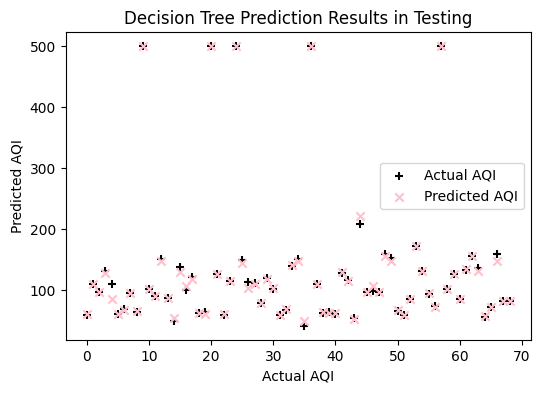

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, c='black', marker='+', label='Actual AQI')
plt.scatter(range(len(dt_y_predict)), dt_y_predict, c='pink', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Decision Tree Prediction Results in Testing')
plt.legend()
plt.show()

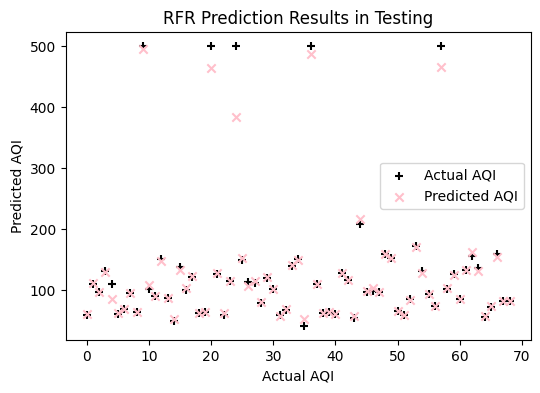

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, c='black', marker='+', label='Actual AQI')
plt.scatter(range(len(rt_y_predict)), rt_y_predict, c='Pink', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('RFR Prediction Results in Testing')
plt.legend()
plt.show()

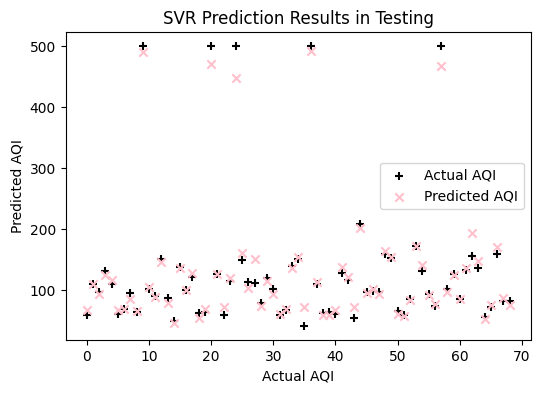

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, c='black', marker='+', label='Actual AQI')
plt.scatter(range(len(svr_y_predict.T)), svr_y_predict.T, c='pink', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('SVR Prediction Results in Testing')
plt.legend()
plt.show()

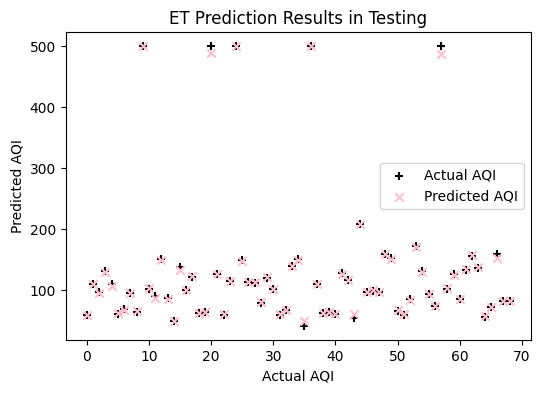

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, c='black', marker='+', label='Actual AQI')
plt.scatter(range(len(y_pred_et.T)), y_pred_et.T, c='pink', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('ET Prediction Results in Testing')
plt.legend()
plt.show()

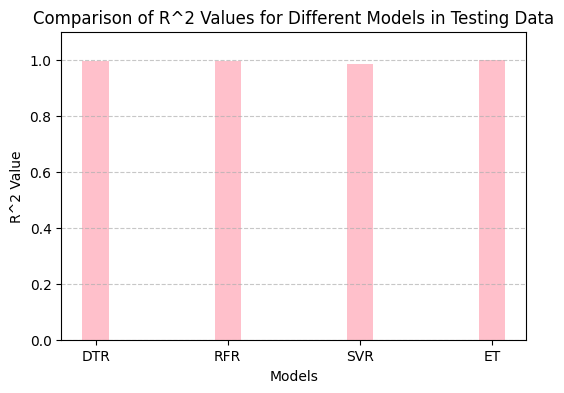

In [ ]:
# R^2 values for different models
models = ['DTR', 'RFR', 'SVR', 'ET']
r2_values = [0.9964,0.9944,0.9835,0.9993]
colors = ['pink', 'pink', 'pink', 'pink', 'pink']

plt.figure(figsize=(6,4 ))
plt.bar(models, r2_values, color=colors, width=0.2)
plt.xlabel('Models')
plt.ylabel('R^2 Value')
plt.title('Comparison of R^2 Values for Different Models in Testing Data')
plt.ylim(0, 1.1)  # Setting y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


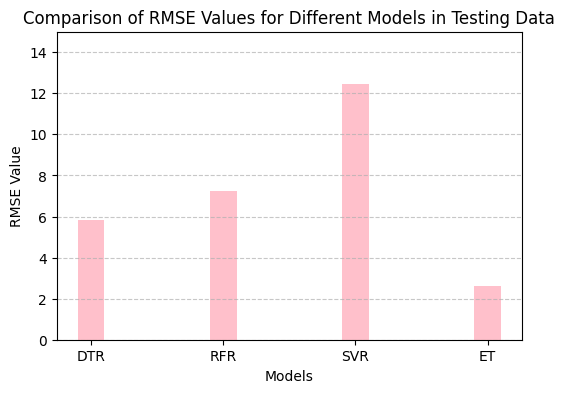

In [ ]:
# RMSE values for different models
models = ['DTR', 'RFR', 'SVR', 'ET']
rmse_values = [5.8279,7.2611,12.4452,2.6044]
colors = ['pink', 'pink', 'pink', 'pink', 'pink']

plt.figure(figsize=(6,4 ))
plt.bar(models, rmse_values, color=colors, width=0.2)
plt.xlabel('Models')
plt.ylabel('RMSE Value')
plt.title('Comparison of RMSE Values for Different Models in Testing Data')
plt.ylim(0, 15)  # Setting y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
